<a href="https://colab.research.google.com/github/georgeputhean/pop-performance/blob/main/POP_Performance_Cleaning_Data_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None 

import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df=pd.read_csv("/content/drive/My Drive/Matched Data.csv")

In [57]:
df.columns

Index(['Unnamed: 0', 'Grade_x', 'School Name', 'School Year_x', 'Notes',
       'Tangerine Test ID', 'Student Number', 'Student Test Number',
       'Date of Test', 'Control or Treatment?', 'Pre or Post?',
       'EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Rea

In [58]:
df1=df.drop(['School Name','Unnamed: 0','Notes','Tangerine Test ID','Student Number', 'Student Test Number','Skill to Improve 1 Notes','Skill to Improve 2 Notes','Skill to Improve 3 Notes',
              'Teacher Number: Full Name','Skill to Improve 3','Recommended Next Steps', 'What Went Well?', 'Second Teacher Present','Control or Treatment?',
       'School: School Name','Teacher Class Number', 'Teacher Assessment Number', 'Question 1', 'Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8', 'Grade_y'],axis=1)

In [59]:
df_target=df1.filter(like='EGRA Section')

In [60]:
df_x = df1[df1.columns.drop(list(df.filter(regex='EGRA Section')))]

In [61]:
len(df_target.columns)

20

In [62]:
df_x.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [63]:
df_x_clean=df_x

In [64]:
df_x_clean['Grade_x']=df_x['Grade_x'].str[8:9]

In [65]:
df_x_clean['Q1 Rating or Answer']

0       2 - Approaching Effective
1       2 - Approaching Effective
2       2 - Approaching Effective
3       2 - Approaching Effective
4       2 - Approaching Effective
                  ...            
1052                3 - Effective
1053                3 - Effective
1054                3 - Effective
1055                3 - Effective
1056                3 - Effective
Name: Q1 Rating or Answer, Length: 1057, dtype: object

In [66]:
df_x_clean['Q1 Rating or Answer']=df_x['Q1 Rating or Answer'].str[0:1]
df_x_clean['Q2 Rating'] = df_x['Q2 Rating'].str[0:1]
df_x_clean['Q3 Rating or Answer']= df_x['Q3 Rating or Answer'].str[0:1]
df_x_clean['Q4 Rating or Answer']= df_x['Q4 Rating or Answer'].str[0:1]
df_x_clean['Q5 Rating or Answer']= df_x['Q5 Rating or Answer'].str[0:1]
df_x_clean['Q6 Rating or Answer']= df_x['Q6 Rating or Answer'].str[0:1]
df_x_clean['Q7 Rating']= df_x['Q7 Rating'].str[0:1]
df_x_clean['Q8 Rating']= df_x['Q8 Rating'].str[0:1]

In [67]:
len(df_x_clean.columns)

31

Set the Rating to None when teacher not present

In [68]:
df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']]=df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']].fillna(0)

In [69]:
df_x_clean[df_x_clean['Teacher Present']=='Not Present'].count()

Grade_x                                                    277
School Year_x                                              277
Date of Test                                               277
Pre or Post?                                               277
Main Language Used In Exam                                 272
EGRA Question 1: Reading Habit                             277
EGRA Last Book Read                                        277
Reads With Others                                          277
How Often, ReadsWithOthers                                 277
Student Gender                                             277
Class Number                                               277
Teacher Number: Teacher Number                             277
Date                                                       277
Q1 Rating or Answer                                        277
Q2 Rating                                                  277
Q3 Rating or Answer                                    

In [70]:
df_x_clean['Q1 Rating or Answer'].value_counts()

3    474
2    306
0    277
Name: Q1 Rating or Answer, dtype: int64

Minutes mean

In [71]:
mean_min=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].mean()

In [72]:
df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']]=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].fillna(mean_min)

Skills to None

In [73]:
df_x_clean[['Skill to Improve 1','Skill to Improve 2']]=df_x_clean[['Skill to Improve 1','Skill to Improve 2']].fillna("None")

In [74]:
df_x_clean[['Main Language Used In Exam']].value_counts()

Main Language Used In Exam
English; Ewe                  776
English                       167
Ewe                            95
dtype: int64

In [75]:
df_x_clean[['Main Language Used In Exam']]=df_x_clean[['Main Language Used In Exam']].fillna("English; Ewe")

In [76]:
#ns.pairplot(df1,hue="Pre or Post?")

In [77]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [78]:
df_x_clean.count()

Grade_x                                                    1057
School Year_x                                              1057
Date of Test                                               1057
Pre or Post?                                               1057
Main Language Used In Exam                                 1057
EGRA Question 1: Reading Habit                             1057
EGRA Last Book Read                                        1057
Reads With Others                                          1057
How Often, ReadsWithOthers                                 1057
Student Gender                                             1057
Class Number                                               1057
Teacher Number: Teacher Number                             1057
Date                                                       1057
Q1 Rating or Answer                                        1057
Q2 Rating                                                  1057
Q3 Rating or Answer                     

In [79]:
df_x_clean['Teacher Number: School Years in Teacher Support Program']=df_x_clean['Teacher Number: School Years in Teacher Support Program'].str.count('-')

In [80]:
df_q=df_x_clean.filter(like='Rating')

In [81]:
df_q = df_q.astype('int')

In [82]:
# sns.pairplot(df_q)


In [83]:
df_target['EGRA Section 1 Total Score']=df_target['EGRA Section 1a Score']+df_target['EGRA Section 1b Score']+df_target['EGRA Section 1c Score']
df_target['EGRA Section 6 Total Score']=df_target['EGRA Section 6 Written Words Correct']+df_target['EGRA Section 6 Correct Space/Direction']+df_target['EGRA Section 6 Correct Punctuation']+df_target['EGRA Section 6 Correct Use of Capitals']

In [84]:
df_target['EGRA Section 3 LPM']=df_target['EGRA Section 3 LPM'].fillna(df_target['EGRA Section 3 LPM'].mean())

In [85]:
df_target.count()

EGRA Section 1a Score                     1057
EGRA Section 1b Score                     1057
EGRA Section 1c Score                     1057
EGRA Section 2a Score                     1057
EGRA Section 2b Score                     1057
EGRA Section 3 Letters Correct            1057
EGRA Section 3 Time Completed             1055
EGRA Section 3 LPM                        1057
EGRA Section 4 Words Correct              1057
EGRA Section 4 Time Completed             1052
EGRA Section 4: WPM                       1057
EGRA Section 5 Words Correct              1057
EGRA Section 5 Time Completed             1054
EGRA Section 5 CWPM                       1057
EGRA Section 5 Questions Correct          1057
EGRA Section 6 Written Words Correct      1057
EGRA Section 6 Correct Space/Direction    1057
EGRA Section 6 Correct Punctuation        1057
EGRA Section 6 Correct Use of Capitals    1057
EGRA Section 7a Score                     1057
EGRA Section 1 Total Score                1057
EGRA Section 

In [86]:
df_target_unique=df_target

In [87]:
df_target_unique.columns

Index(['EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'EGRA Section 1 Total Score', 'EGRA Section 6 Total Score'],
      dtype='object')

In [88]:
# plt.figure(figsize=(16, 6))

# sns.heatmap(df_target_unique.corr(),annot=True);


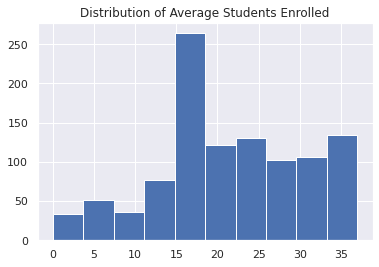

In [89]:
plt.hist(df_x_clean['Average Students Enrolled'])
plt.title("Distribution of Average Students Enrolled")
plt.show()


In [90]:
df_target.columns

Index(['EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'EGRA Section 1 Total Score', 'EGRA Section 6 Total Score'],
      dtype='object')

In [91]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [92]:
df_x_clean['How Often, ReadsWithOthers'].astype('category')

0       1
1       3
2       1
3       1
4       2
       ..
1052    2
1053    1
1054    3
1055    3
1056    3
Name: How Often, ReadsWithOthers, Length: 1057, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

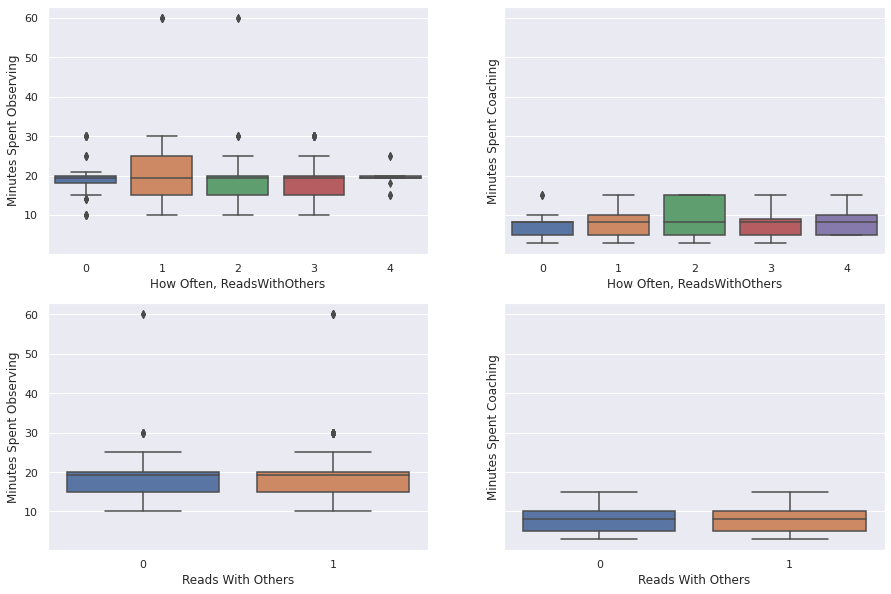

In [93]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2,sharey=True)

sns.boxplot(x=df_x_clean['How Often, ReadsWithOthers'],y=df_x_clean['Minutes Spent Observing'],ax=axes[0,0])
sns.boxplot(x=df_x_clean['How Often, ReadsWithOthers'],y=df_x_clean['Minutes Spent Coaching'],ax=axes[0,1])
sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Observing'],ax=axes[1,0])
sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Coaching'],ax=axes[1,1])

plt.show()

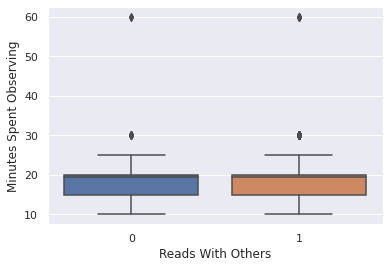

In [94]:
 sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Observing'])
sns.set(style="darkgrid")


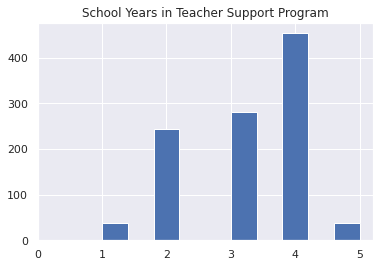

In [95]:
plt.hist(df_x_clean['Teacher Number: School Years in Teacher Support Program'])
plt.title("School Years in Teacher Support Program")
plt.xticks(range(6))
plt.show()

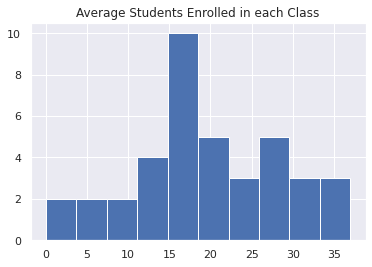

In [96]:
plt.hist(df_x_clean.groupby('Class Number')['Average Students Enrolled'].first())
plt.title("Average Students Enrolled in each Class")
plt.show()

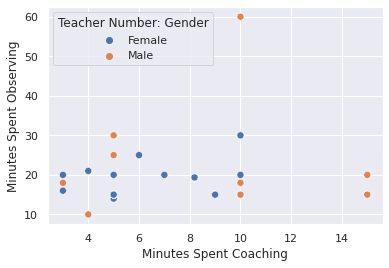

In [97]:
sns.scatterplot(df_x_clean['Minutes Spent Coaching'],df_x_clean['Minutes Spent Observing'],s=50,hue=df_x_clean['Teacher Number: Gender'])

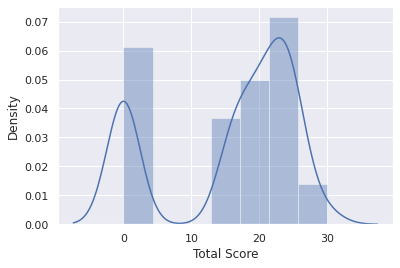

In [45]:
sns.distplot(df_x_clean['Total Score'])

In [46]:
df_x_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Grade_x                                                  1057 non-null   object 
 1   School Year_x                                            1057 non-null   object 
 2   Date of Test                                             1057 non-null   object 
 3   Pre or Post?                                             1057 non-null   object 
 4   Main Language Used In Exam                               1057 non-null   object 
 5   EGRA Question 1: Reading Habit                           1057 non-null   object 
 6   EGRA Last Book Read                                      1057 non-null   object 
 7   Reads With Others                                        1057 non-null   int64  
 8   How Often, ReadsWithOthers  

1. Create a match between the teacher data and Student data
  - what join key
2. Clean the Data
  - fillna
  - striping unwanted values
  - creating new cal columns
  - One hot encoding - desirable
  - normalization -desirable
3. Models
  - Teacher score analysis - student performance vs teacher,student feature except skills
  - skill analysis - student performance vs skill analysis
  - course effectiveness - teacher performance vs school years in the program

In [47]:
# plt.hist(df_x_clean.groupby('Teacher Number: Teacher Number')['Teacher Number: School Years in Teacher Support Program'].first())
# plt.title("School Years in Teacher Support Program")
# plt.xticks(range(6))
# plt.xlabel('Year')
# plt.show()

Meeting
- Comprehenseive score different needed?
- how can we handle diff units points/min points

**Teacher score analysis - student performance vs teacher,student feature except skills** by wenxi chen
- eg: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- Normalizing+one-hotcoding
- EDA in combination

**skill analysis - student performance vs skill analysis**
- Linear regression 
- one hot encoding mandotary\
EDA
- EDA 2 plots section 1 total score vs skill1

**course effectiveness - teacher performance vs school years in the program**
Linear regression - school years+ when we add others how is it working out

EDA plots


COMPRHENSIVE Test
STUDENT - Wenxi + Jane
SKILL - George
COURSE - Zoe

EDA - Sydney + Jane
PPT - 5
FORMAT-


In [48]:
df_target['EGRA Section 6 Total Score']

0       1
1       2
2       1
3       2
4       2
       ..
1052    2
1053    1
1054    2
1055    0
1056    2
Name: EGRA Section 6 Total Score, Length: 1057, dtype: int64

In [49]:
df_target['EGRA Section 5 CWPM']

0       93
1       30
2       50
3       24
4       25
        ..
1052     1
1053     4
1054     0
1055     0
1056     0
Name: EGRA Section 5 CWPM, Length: 1057, dtype: int64

In [50]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [51]:
df_x_clean

,Grade_x,School Year_x,Date of Test,Pre or Post?,Main Language Used In Exam,EGRA Question 1: Reading Habit,EGRA Last Book Read,Reads With Others,"How Often, ReadsWithOthers",Student Gender,...,Skill to Improve 1,Skill to Improve 2,Minutes Spent Observing,Minutes Spent Coaching,Total Score,Teacher Number: Gender,Teacher Number: School Years in Teacher Support Program,Teacher Present,Average Students Enrolled,School Year_y
0,4,2019-2020,10/8/19,Pre,English; Ewe,Yes,Yes,1,1,Male,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
1,4,2019-2020,10/10/19,Pre,English; Ewe,Yes,No,1,3,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
2,4,2019-2020,10/10/19,Pre,English; Ewe,Yes,No,1,1,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
3,4,2019-2020,10/7/19,Pre,English,Yes,No,1,1,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
4,4,2019-2020,10/9/19,Pre,English; Ewe,Yes,Yes,0,2,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,2,2019-2020,10/10/19,Pre,Ewe,No,No,0,2,Female,...,Communication of Content,Lesson Objectives,20.0,7.0,25,Female,2,Present,30,2019-2020
1053,2,2019-2020,10/9/19,Pre,English; Ewe,Yes,No,1,1,Female,...,Communication of Content,Lesson Objectives,20.0,7.0,25,Female,2,Present,30,2019-2020
1054,2,2019-2020,10/10/19,Pre,Ewe,Yes,No,1,3,Male,...,Communication of Content,Lesson Objectives,20.0,7.0,25,Female,2,Present,30,2019-2020
1055,2,2019-2020,10/10/19,Pre,English; Ewe,Yes,Yes,1,3,Male,...,Communication of Content,Lesson Objectives,20.0,7.0,25,Female,2,Present,30,2019-2020


In [52]:
df_target['Cumulative Score'] = df_target['EGRA Section 1 Total Score']*33.3333 + df_target['EGRA Section 2a Score']*2 + df_target['EGRA Section 2b Score'] * 10 + df_target['EGRA Section 3 Letters Correct'] + df_target['EGRA Section 4 Words Correct'] * 2 + df_target['EGRA Section 5 Words Correct'] * 3 + df_target['EGRA Section 5 Questions Correct'] * 15 + df_target["EGRA Section 6 Total Score"]*12.5 + df_target["EGRA Section 7a Score"] *25

In [53]:
df_target['Cumulative Score'] 

0       423.4999
1       473.9999
2       483.4999
3       623.9999
4       437.9999
          ...   
1052    150.9999
1053    295.4999
1054    136.9999
1055    175.9999
1056    363.9999
Name: Cumulative Score, Length: 1057, dtype: float64

In [98]:
df_target.head(5)

,EGRA Section 1a Score,EGRA Section 1b Score,EGRA Section 1c Score,EGRA Section 2a Score,EGRA Section 2b Score,EGRA Section 3 Letters Correct,EGRA Section 3 Time Completed,EGRA Section 3 LPM,EGRA Section 4 Words Correct,EGRA Section 4 Time Completed,...,EGRA Section 5 Time Completed,EGRA Section 5 CWPM,EGRA Section 5 Questions Correct,EGRA Section 6 Written Words Correct,EGRA Section 6 Correct Space/Direction,EGRA Section 6 Correct Punctuation,EGRA Section 6 Correct Use of Capitals,EGRA Section 7a Score,EGRA Section 1 Total Score,EGRA Section 6 Total Score
0,1,1,1,0,3,14,60.0,14.0,45,43.0,...,38.0,93,0,0,1,0,0,0,3,1
1,1,1,1,0,0,52,60.0,52.0,23,60.0,...,103.0,30,3,0,2,0,0,2,3,2
2,1,1,1,0,0,28,60.0,28.0,32,60.0,...,70.0,50,2,0,1,0,0,3,3,1
3,1,1,1,12,7,75,60.0,75.0,12,60.0,...,117.0,24,6,0,2,0,0,3,3,2
4,1,1,1,0,6,26,60.0,26.0,12,60.0,...,121.0,25,0,0,1,0,1,2,3,2


In [99]:
df_x_clean.head()

,Grade_x,School Year_x,Date of Test,Pre or Post?,Main Language Used In Exam,EGRA Question 1: Reading Habit,EGRA Last Book Read,Reads With Others,"How Often, ReadsWithOthers",Student Gender,...,Skill to Improve 1,Skill to Improve 2,Minutes Spent Observing,Minutes Spent Coaching,Total Score,Teacher Number: Gender,Teacher Number: School Years in Teacher Support Program,Teacher Present,Average Students Enrolled,School Year_y
0,4,2019-2020,10/8/19,Pre,English; Ewe,Yes,Yes,1,1,Male,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
1,4,2019-2020,10/10/19,Pre,English; Ewe,Yes,No,1,3,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
2,4,2019-2020,10/10/19,Pre,English; Ewe,Yes,No,1,1,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
3,4,2019-2020,10/7/19,Pre,English,Yes,No,1,1,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020
4,4,2019-2020,10/9/19,Pre,English; Ewe,Yes,Yes,0,2,Female,...,Preparation,Preparation,25.0,6.0,16,Female,3,Present,19,2019-2020


In [100]:
df_x_clean['Pre or Post?'].value_counts()

Pre     699
Post    358
Name: Pre or Post?, dtype: int64

In [101]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [102]:
df_x_clean['School Year_y']

0       2019-2020
1       2019-2020
2       2019-2020
3       2019-2020
4       2019-2020
          ...    
1052    2019-2020
1053    2019-2020
1054    2019-2020
1055    2019-2020
1056    2019-2020
Name: School Year_y, Length: 1057, dtype: object

In [103]:
df_x_clean['Teacher Present'].unique()

array(['Present', 'Not Present'], dtype=object)

In [104]:
df_x_clean['Teacher Present'] = df_x_clean['Teacher Present'].map({
    "Present":1,
    "Not Present":0
})

In [105]:
df_x_clean['Teacher Number: Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [106]:
df_x_clean['Teacher Number: Gender'] = df_x_clean['Teacher Number: Gender'].map({
    "Male":1,
    "Female":0
})

In [107]:
df_x_clean['Student Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [108]:
df_x_clean['Student Gender'] = df_x_clean['Student Gender'].map({
    "Male":1,
    "Female":0
})

In [109]:
df_x_clean['EGRA Last Book Read'].unique()

array(['Yes', 'No'], dtype=object)

In [110]:
df_x_clean['EGRA Last Book Read'] = df_x_clean['EGRA Last Book Read'].map({
    "Yes":1,
    "No":0
})

In [111]:
df_x_clean['EGRA Question 1: Reading Habit'].unique()

array(['Yes', 'No'], dtype=object)

In [112]:
df_x_clean['EGRA Question 1: Reading Habit'] = df_x_clean['EGRA Question 1: Reading Habit'].map({
    "Yes":1,
    "No":0
})

In [113]:
df_x_clean=df_x_clean.drop(labels=['Date of Test','Class Number',
       'Teacher Number: Teacher Number', 'Date','School Year_y'],axis=1)

In [114]:
df_x_clean['Main Language Used In Exam'].unique()

array(['English; Ewe', 'English', 'Ewe'], dtype=object)

In [115]:
df_x_clean['Main Language Used In Exam'] = df_x_clean['Main Language Used In Exam'].map({
    "Ewe": 1,
    "English": 2,
    "English; Ewe": 3
})

In [116]:
len(df_x_clean.columns)

26

### Encode to multiple categories

In [117]:
df_x_clean['School Year_x'].unique()

array(['2019-2020', '2020-2021', '2018-2019'], dtype=object)

In [118]:
df_x_clean["School Year_x"] = df_x_clean["School Year_x"].map({
    "2019-2020": 2020,
    "2020-2021": 2021,
    "2018-2019": 2019
})

In [119]:
df_x_clean["School Year_x"].unique()

array([2020, 2021, 2019])

In [120]:
df_x_clean['Pre or Post?'] = df_x_clean['Pre or Post?'].map({
   "Pre":0,
   "Post":1 
})

In [121]:
df_x_clean['Pre or Post?'] 

0       0
1       0
2       0
3       0
4       0
       ..
1052    0
1053    0
1054    0
1055    0
1056    0
Name: Pre or Post?, Length: 1057, dtype: int64

In [122]:
matched_clean=pd.concat([df_target,df_x_clean],axis=1)

In [123]:
matched_clean.to_csv("Matched Clean.csv")

In [124]:
df_target.to_csv("Target_Pop.csv")

In [125]:
df_x_clean.to_csv("Feature_Pop .csv")